
Inspect the class label distribution for data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
def count_distribution_of_labels(label_list, data_save_path, plot_save_path, plot_theme):
    label_distri = {i: label_list.count(i) for i in label_list}
    sorted_label_distri = dict(sorted(label_distri.items(), key=lambda item: item[1], reverse=True))
    num_lbs = len(label_distri)
    print(str(num_lbs) + ' labels in this data')
    
    ## Save distribution data to pickle
    with open(data_save_path, 'wb') as f:
        pickle.dump(sorted_label_distri, f, protocol=pickle.HIGHEST_PROTOCOL)
    
    ## Plot
    data=list(sorted_label_distri.values())
    data_lbs = list(sorted_label_distri.keys())
    if num_lbs >= 80:
        height = num_lbs//6 + 4
    else:
        height = 10

    plt.figure(figsize=(12,height))

    plt.barh(range(len(data)), data)
    plt.ylabel(plot_theme + ' labels')
    plt.xlabel('the number of spectrums')
    plt.title('Distribution of '+plot_theme+' labels')
    plt.yticks(range(len(data)), data_lbs)
    for i in range(len(data)):
          plt.text(data[i]+0.1,i,"%s"%data[i])

    plt.savefig(plot_save_path, bbox_inches = 'tight', dpi=600)
    plt.show()
    return sorted_label_distri

def plot_summary(sorted_label_distri, hist_width, num_hist, plot_save_path, plot_theme):
    # Get all values of distribution
    num_labels = list(sorted_label_distri.values())
    len(num_labels)

    # Define ranges
    num_range = np.linspace(0, hist_width*num_hist, num_hist, endpoint=False, dtype=int)
    print(num_range)

    # Summary the distribution
    sum_dict={}
    for i in range(len(num_range)):
        if i != len(num_range)-1:        
            count_num=0
            for j in num_labels:
                if j in range(num_range[i],num_range[i+1]):
                    count_num+=1
            sum_dict['%s to %s'%(num_range[i],num_range[i+1])]=count_num
        else:
            count_num=0
            for j in num_labels:
                if j >= num_range[-1]:
                    count_num+=1
            sum_dict['%s to'%num_range[i]]=count_num
    print(sum_dict)
    # Plot the summary of distribution
    data = list(sum_dict.values())
    data_name = list(sum_dict.keys())

    plt.figure(figsize=(10,8))
    plt.bar(range(len(data)), data)
    plt.xlabel('the number of spectrums per label')
    plt.ylabel('the number of labels')
    plt.title('Summary of '+plot_theme+' distribution')
    plt.xticks(range(len(data)), data_name)
    for i in range(len(data)):
        plt.text(i,data[i]+0.1,"%s"%data[i])

    plt.savefig(plot_save_path, bbox_inches = 'tight', dpi=600)
    plt.show()

### Set save directory path

In [3]:
save_dir = '/mnt/scratch/ding013/MS2ChemClass/classlabel_distr/'

### Count the distribution of labels

NPClassifier Pathway

8 labels in this data


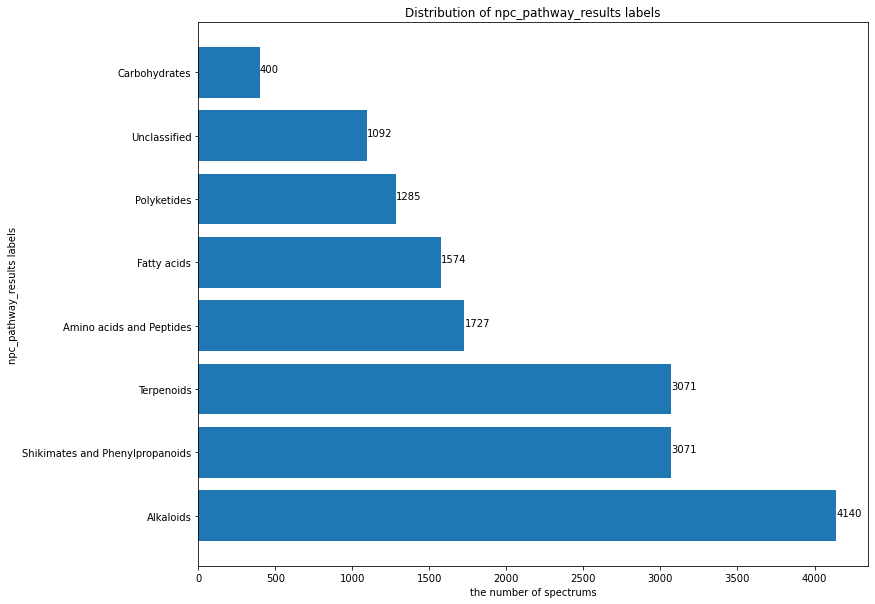

In [4]:
base = 'npc_pathway_results'
with open('/mnt/scratch/ding013/MS2ChemClass/embedding_arrays_for_classification/y_'+ base +'_labels.pickle', 'rb') as f:
    label_list = pickle.load(f)
data_save_path = save_dir + base + '_lbs_distribution.pickle'
plot_save_path = save_dir + base + '_lbs_distribution.svg'
lbs_distri = count_distribution_of_labels(label_list, data_save_path, plot_save_path, base)

NPClassifier Superclass

71 labels in this data


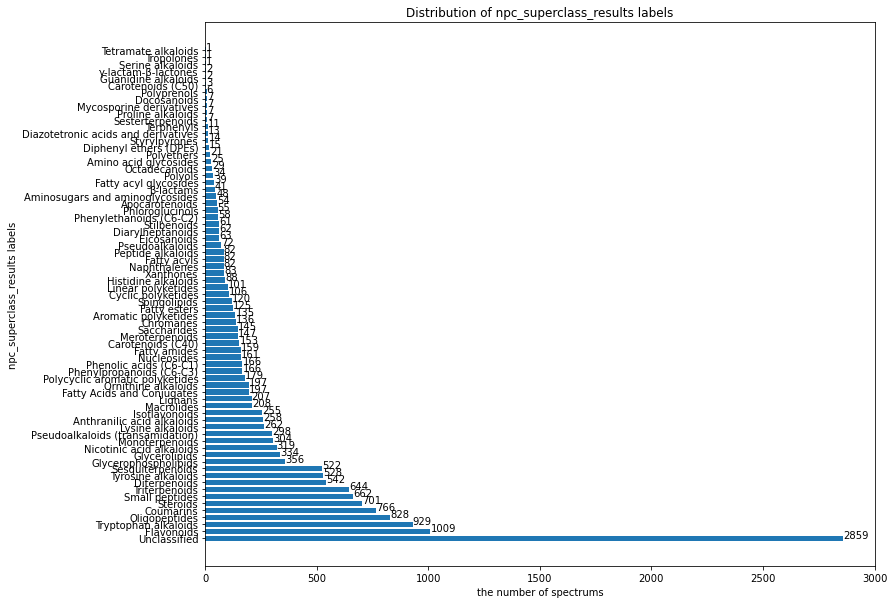

[  0 100 200 300 400]
{'0 to 100': 34, '100 to 200': 16, '200 to 300': 6, '300 to 400': 4, '400 to': 11}


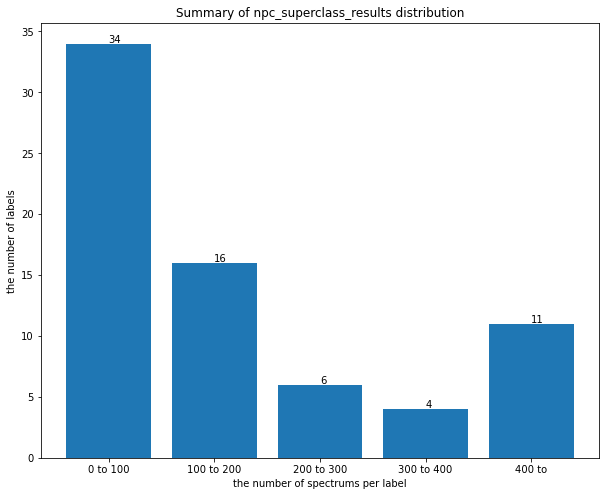

In [5]:
base = 'npc_superclass_results'
with open('/mnt/scratch/ding013/MS2ChemClass/embedding_arrays_for_classification/y_'+ base +'_labels.pickle', 'rb') as f:
    label_list = pickle.load(f)
data_save_path = save_dir + base + '_lbs_distribution.pickle'
plot_save_path = save_dir + base + '_lbs_distribution.svg'
lbs_distri = count_distribution_of_labels(label_list, data_save_path, plot_save_path, base)
plot_summary(lbs_distri, 100, 5, plot_save_path, base)

NPClassifier Class

450 labels in this data


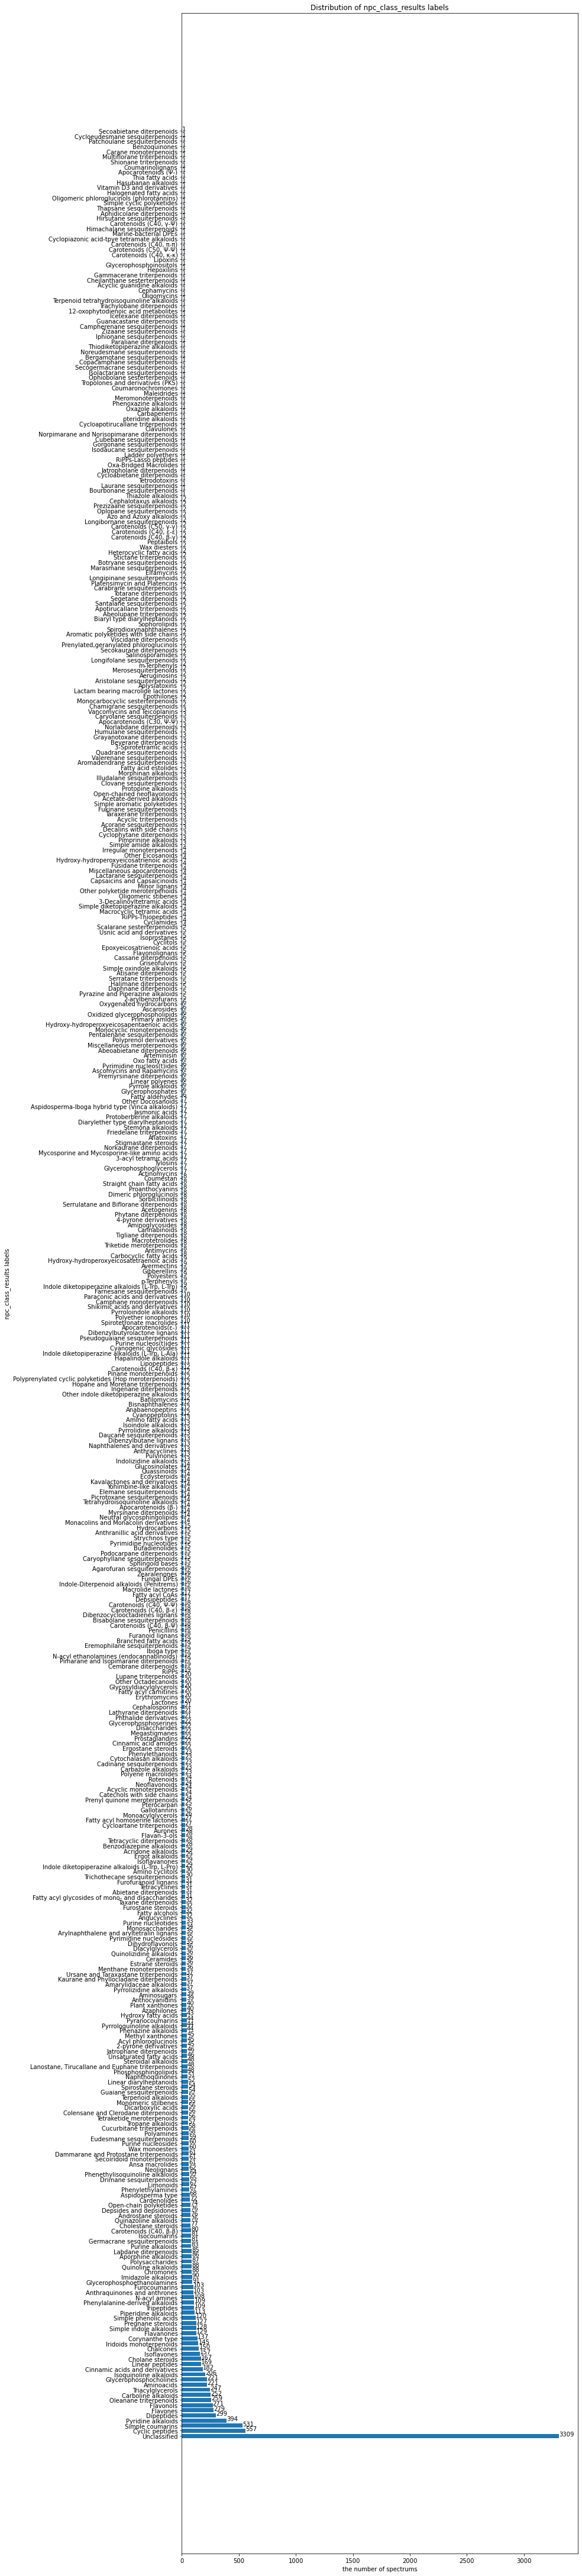

[  0 100 200 300 400]
{'0 to 100': 420, '100 to 200': 17, '200 to 300': 9, '300 to 400': 1, '400 to': 3}


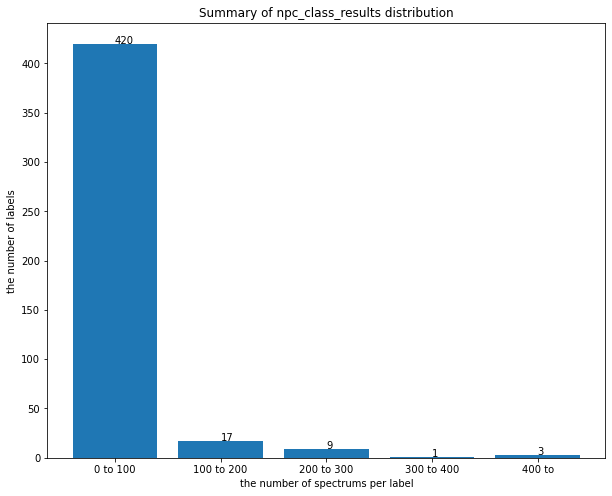

In [6]:
base = 'npc_class_results'
with open('/mnt/scratch/ding013/MS2ChemClass/embedding_arrays_for_classification/y_'+ base +'_labels.pickle', 'rb') as f:
    label_list = pickle.load(f)
data_save_path = save_dir + base + '_lbs_distribution.pickle'
plot_save_path = save_dir + base + '_lbs_distribution.svg'
lbs_distri = count_distribution_of_labels(label_list, data_save_path, plot_save_path, base)
plot_summary(lbs_distri, 100, 5, plot_save_path, base)

ClassyFire Superclass

20 labels in this data


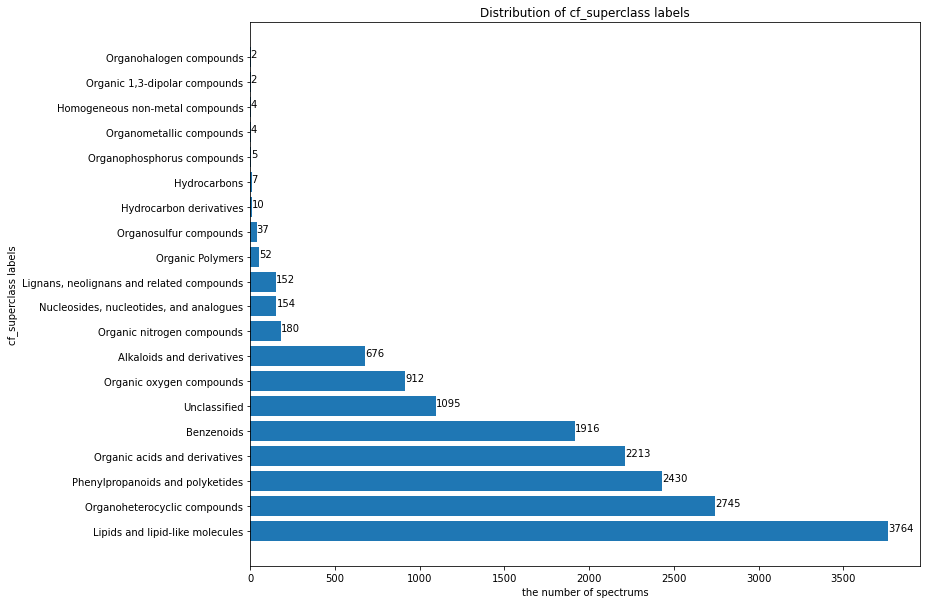

In [7]:
base = 'cf_superclass'
with open('/mnt/scratch/ding013/MS2ChemClass/embedding_arrays_for_classification/y_'+ base +'_labels.pickle', 'rb') as f:
    label_list = pickle.load(f)
data_save_path = save_dir + base + '_lbs_distribution.pickle'
plot_save_path = save_dir + base + '_lbs_distribution.svg'
lbs_distri = count_distribution_of_labels(label_list, data_save_path, plot_save_path, base)

ClassyFire Class

279 labels in this data


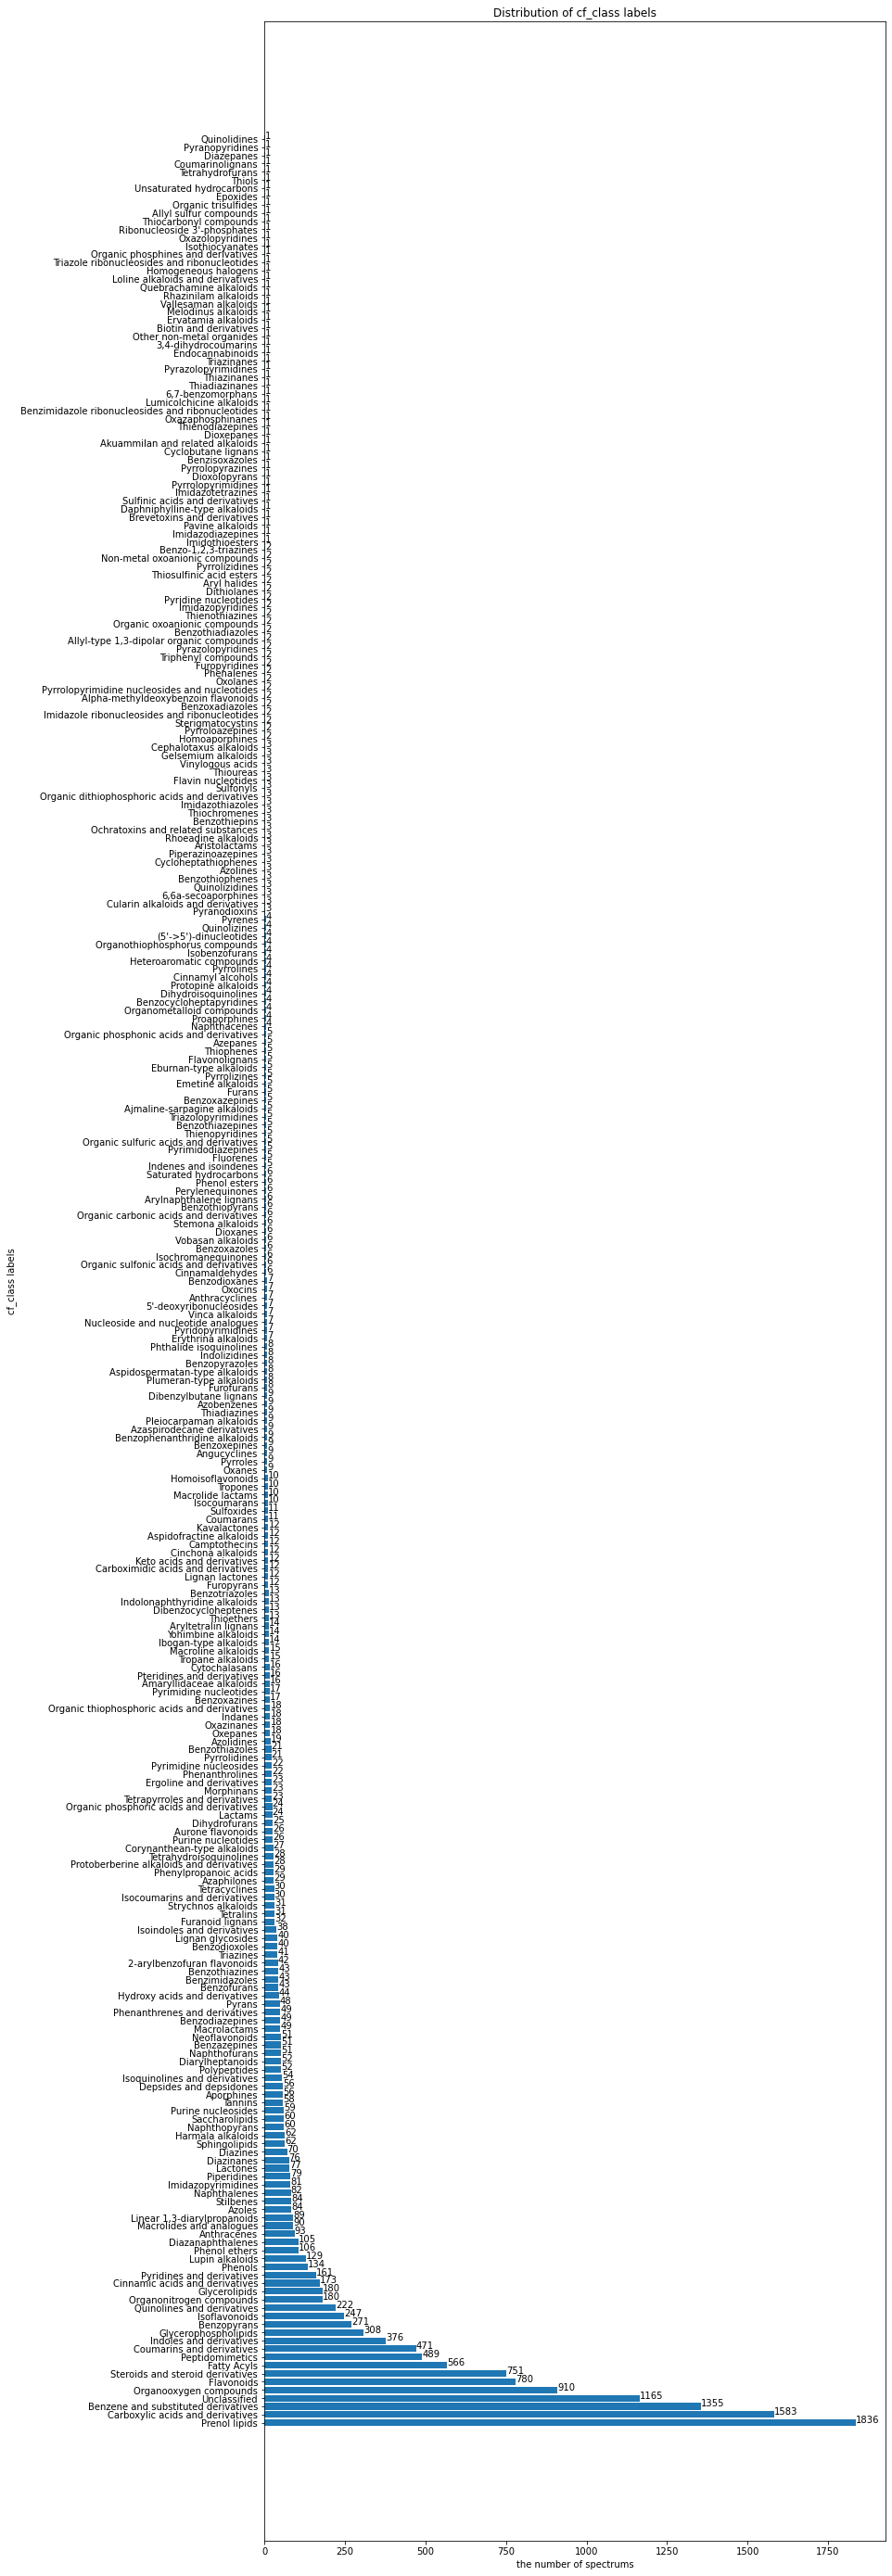

[  0 100 200 300 400]
{'0 to 100': 256, '100 to 200': 8, '200 to 300': 3, '300 to 400': 2, '400 to': 10}


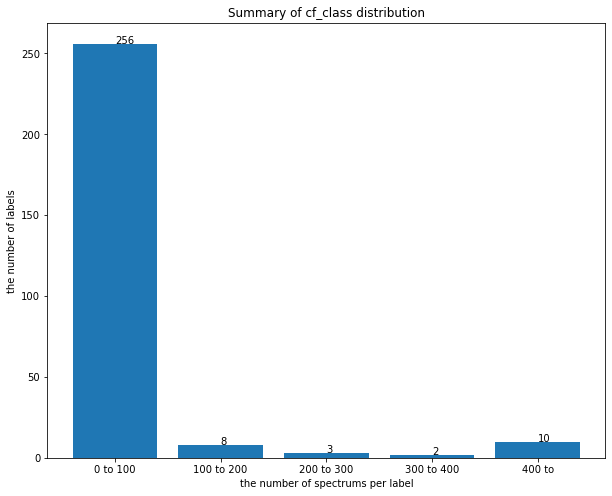

In [8]:
base = 'cf_class'
with open('/mnt/scratch/ding013/MS2ChemClass/embedding_arrays_for_classification/y_'+ base +'_labels.pickle', 'rb') as f:
    label_list = pickle.load(f)
data_save_path = save_dir + base + '_lbs_distribution.pickle'
plot_save_path = save_dir + base + '_lbs_distribution.svg'
lbs_distri = count_distribution_of_labels(label_list, data_save_path, plot_save_path, base)
plot_summary(lbs_distri, 100, 5, plot_save_path, base)

ClassyFire Subclass

466 labels in this data


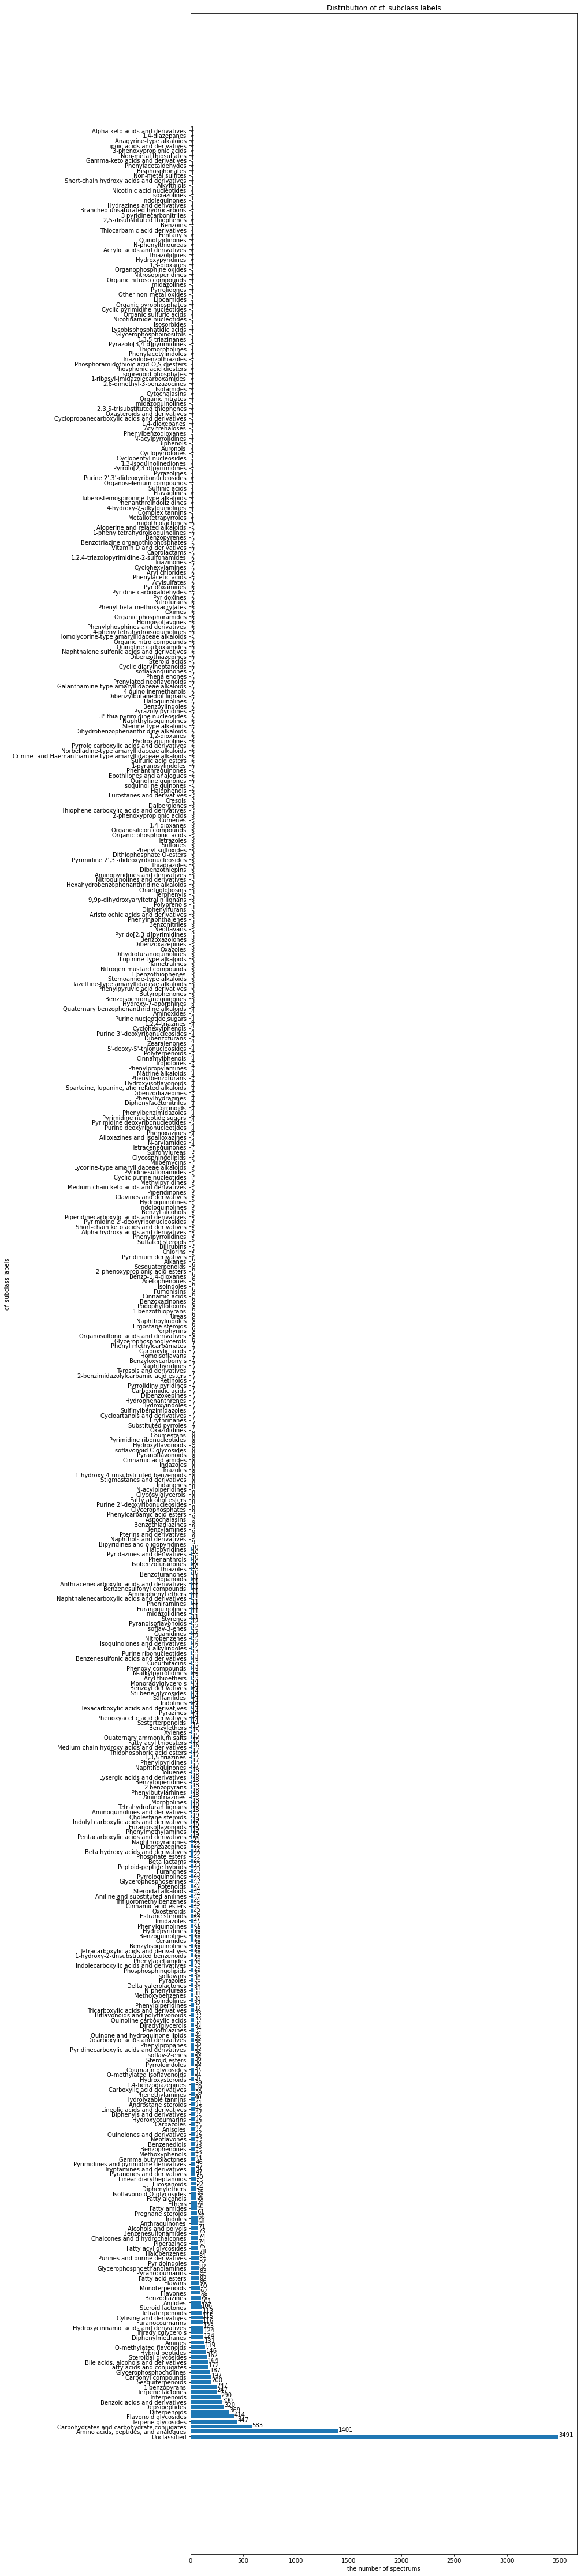

[  0 100 200 300 400]
{'0 to 100': 438, '100 to 200': 16, '200 to 300': 4, '300 to 400': 3, '400 to': 5}


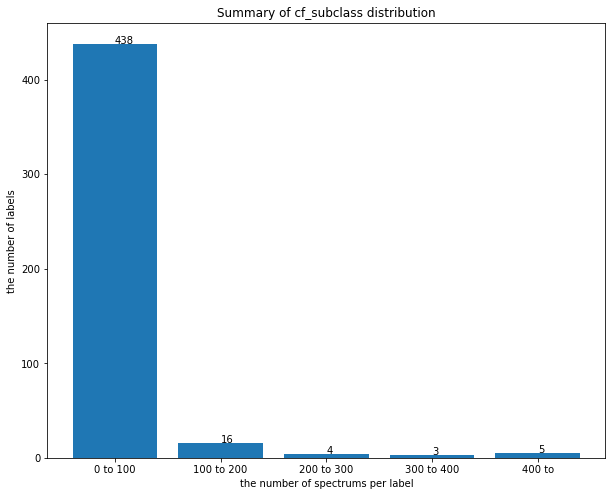

In [9]:
base = 'cf_subclass'
with open('/mnt/scratch/ding013/MS2ChemClass/embedding_arrays_for_classification/y_'+ base +'_labels.pickle', 'rb') as f:
    label_list = pickle.load(f)
data_save_path = save_dir + base + '_lbs_distribution.pickle'
plot_save_path = save_dir + base + '_lbs_distribution.svg'
lbs_distri = count_distribution_of_labels(label_list, data_save_path, plot_save_path, base)
plot_summary(lbs_distri, 100, 5, plot_save_path, base)